 Import and Install Dependencies

In [ ]:
#pip uninstall tensorflow

In [363]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

Keypoints using MP Holistic

In [364]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [365]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [366]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [367]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [368]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

cap = cv2.VideoCapture(0)
  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed ,set media pipemodel
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        #draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [370]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

#RUN THIS to get frame
cap = cv2.VideoCapture(0)
#Set mediapipe model
while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        cv2.imshow('OpenCV Feed', frame)
        # Show to screen
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [371]:
results

mediapipe.python.solution_base.SolutionOutputs

In [372]:
results.face_landmarks

landmark {
  x: 0.6454623341560364
  y: 0.4746384024620056
  z: -0.04094620421528816
}
landmark {
  x: 0.6446679830551147
  y: 0.4184699058532715
  z: -0.061245985329151154
}
landmark {
  x: 0.6444805264472961
  y: 0.43874481320381165
  z: -0.03489163517951965
}
landmark {
  x: 0.6337599754333496
  y: 0.37288710474967957
  z: -0.04161783307790756
}
landmark {
  x: 0.6444982886314392
  y: 0.40250489115715027
  z: -0.06385430693626404
}
landmark {
  x: 0.6440718173980713
  y: 0.383939653635025
  z: -0.05753320828080177
}
landmark {
  x: 0.6429014801979065
  y: 0.34217017889022827
  z: -0.021400589495897293
}
landmark {
  x: 0.557620644569397
  y: 0.34974533319473267
  z: 0.020986663177609444
}
landmark {
  x: 0.6424487829208374
  y: 0.3072388768196106
  z: -0.010461654514074326
}
landmark {
  x: 0.6424224972724915
  y: 0.28632110357284546
  z: -0.01064645778387785
}
landmark {
  x: 0.6413564085960388
  y: 0.21223053336143494
  z: 0.010116570629179478
}
landmark {
  x: 0.6455743312835693


In [373]:
len(results.right_hand_landmarks.landmark)

21

In [374]:
frame

array([[[132, 131, 130],
        [130, 130, 129],
        [131, 132, 129],
        ...,
        [160, 159, 159],
        [160, 158, 160],
        [161, 159, 162]],

       [[134, 131, 130],
        [133, 131, 130],
        [133, 133, 130],
        ...,
        [160, 159, 159],
        [161, 159, 162],
        [163, 160, 166]],

       [[134, 129, 129],
        [135, 131, 130],
        [136, 133, 132],
        ...,
        [160, 159, 161],
        [161, 160, 164],
        [161, 160, 166]],

       ...,

       [[152, 149, 148],
        [150, 147, 146],
        [153, 150, 148],
        ...,
        [ 80,  49,  44],
        [ 79,  49,  44],
        [ 78,  49,  45]],

       [[151, 149, 146],
        [152, 150, 147],
        [153, 151, 147],
        ...,
        [ 79,  49,  45],
        [ 77,  48,  44],
        [ 75,  47,  43]],

       [[152, 150, 145],
        [154, 152, 147],
        [153, 151, 146],
        ...,
        [ 79,  49,  45],
        [ 76,  47,  43],
        [ 74,  46,  42]]

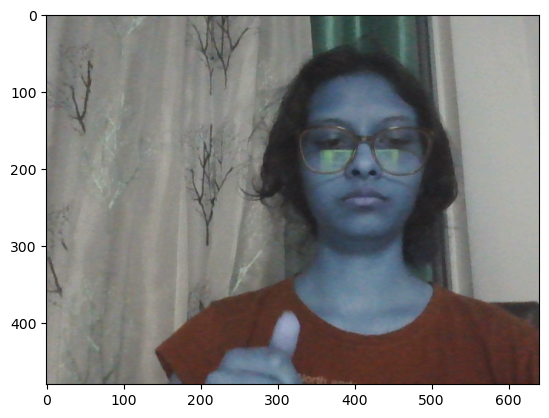

In [375]:
plt.imshow(frame)

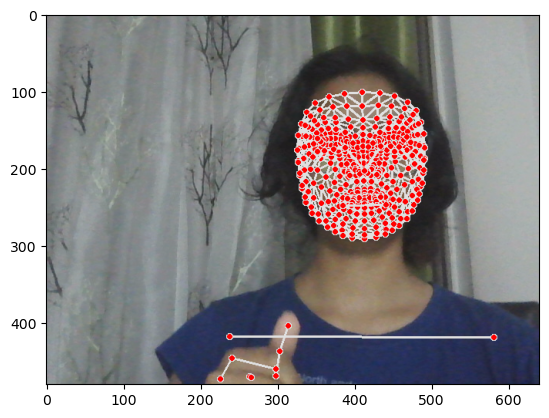

In [376]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [377]:
len(results.right_hand_landmarks.landmark)

21

In [378]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [379]:
len(pose)

33

In [380]:
len(results.face_landmarks.landmark)*3

1404

In [381]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [382]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()if results.face_landmarks else np.zeros(1404)
print (face)



[ 0.64546233  0.4746384  -0.0409462  ...  0.7323429   0.33279461
  0.02686111]


In [383]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [384]:
extract_keypoints(results).shape

(1662,)

In [385]:
result_test = extract_keypoints(results)

In [386]:
result_test

array([ 0.64615554,  0.42298856, -1.29453182, ...,  0.40528682,
        1.1620822 , -0.08702786])

In [387]:
np.save('0', result_test)


In [388]:
np.load('0.npy')
#saving array

array([ 0.64615554,  0.42298856, -1.29453182, ...,  0.40528682,
        1.1620822 , -0.08702786])

Setup Folders for Collection

In [389]:
####### add more signs and language to be updated with many more images

In [390]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'helpplease'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [391]:
#please fill files with asl

In [392]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collect Keypoint Values for Training and Testing

In [ ]:
###########DO NOT RE RUN THIS LINE UNLESS U HAVE TO UPDATE SIGNS 

In [239]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [240]:
cap.release()
cv2.destroyAllWindows()

Preprocess Data and Create Labels and Features


In [393]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [396]:
label_map = {label:num for num, label in enumerate(actions)}

In [397]:
label_map

{'hello': 0, 'helpplease': 1}

In [398]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [399]:
np.array(sequences).shape

(60, 30, 1662)

In [400]:
np.array(labels).shape

(60,)

In [401]:
X = np.array(sequences)

In [402]:
X.shape

(60, 30, 1662)

In [403]:
y = to_categorical(labels).astype(int)

In [404]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [406]:
y_test.shape

(3, 2)

Build and Train LSTM Neural Network

In [407]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [408]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [409]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu')) #activation fn
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [410]:
res = [.7, 0.2, 0.1]

In [411]:
actions[np.argmax(res)]

'hello'

Make Predictions

In [333]:
res = model.predict(X_test)


1/1 [==============================] - 0s 38ms/step


In [334]:
actions[np.argmax(res[2])]


'hello'

In [335]:
actions[np.argmax(y_test[2])]


'hello'

In [336]:
actions[np.argmax(y_test[2])]

'hello'

In [337]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [296]:
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 4s 85ms/step - loss: 0.6807 - categorical_accuracy: 0.5439
Epoch 2/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.6196 - categorical_accuracy: 0.5088
Epoch 3/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.4942 - categorical_accuracy: 0.5439
Epoch 4/2000
2/2 [==============================] - 0s 82ms/step - loss: 0.5063 - categorical_accuracy: 0.5439
Epoch 5/2000
2/2 [==============================] - 0s 87ms/step - loss: 0.4005 - categorical_accuracy: 0.8596
Epoch 6/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.3887 - categorical_accuracy: 0.9474
Epoch 7/2000
2/2 [==============================] - 0s 82ms/step - loss: 0.3606 - categorical_accuracy: 0.9825
Epoch 8/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.3541 - categorical_accuracy: 0.9649
Epoch 9/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.3319 - categorical_accuracy: 0.9825
E

2/2 [==============================] - 0s 92ms/step - loss: 376.1830 - categorical_accuracy: 0.6667
Epoch 74/2000
2/2 [==============================] - 0s 89ms/step - loss: 936.0439 - categorical_accuracy: 0.6140
Epoch 75/2000
2/2 [==============================] - 0s 90ms/step - loss: 1204.0403 - categorical_accuracy: 0.5439
Epoch 76/2000
2/2 [==============================] - 0s 92ms/step - loss: 744.3354 - categorical_accuracy: 0.8070
Epoch 77/2000
2/2 [==============================] - 0s 94ms/step - loss: 298.3530 - categorical_accuracy: 0.5439
Epoch 78/2000
2/2 [==============================] - 0s 93ms/step - loss: 322.6483 - categorical_accuracy: 0.6842
Epoch 79/2000
2/2 [==============================] - 0s 92ms/step - loss: 858.2897 - categorical_accuracy: 0.7719
Epoch 80/2000
2/2 [==============================] - 0s 89ms/step - loss: 585.5601 - categorical_accuracy: 0.5439
Epoch 81/2000
2/2 [==============================] - 0s 88ms/step - loss: 502.4731 - categorical_accu

2/2 [==============================] - 0s 90ms/step - loss: 47.9886 - categorical_accuracy: 0.9123
Epoch 145/2000
2/2 [==============================] - 0s 89ms/step - loss: 59.2538 - categorical_accuracy: 0.9123
Epoch 146/2000
2/2 [==============================] - 0s 89ms/step - loss: 18.8252 - categorical_accuracy: 0.8947
Epoch 147/2000
2/2 [==============================] - 0s 96ms/step - loss: 87.5761 - categorical_accuracy: 0.6491
Epoch 148/2000
2/2 [==============================] - 0s 89ms/step - loss: 57.2987 - categorical_accuracy: 0.9123
Epoch 149/2000
2/2 [==============================] - 0s 95ms/step - loss: 93.0072 - categorical_accuracy: 0.8947
Epoch 150/2000
2/2 [==============================] - 0s 95ms/step - loss: 47.9771 - categorical_accuracy: 0.9123
Epoch 151/2000
2/2 [==============================] - 0s 90ms/step - loss: 110.8780 - categorical_accuracy: 0.5439
Epoch 152/2000
2/2 [==============================] - 0s 99ms/step - loss: 51.1451 - categorical_accur

2/2 [==============================] - 0s 86ms/step - loss: 8.5690 - categorical_accuracy: 0.9123
Epoch 217/2000
2/2 [==============================] - 0s 87ms/step - loss: 5.1757 - categorical_accuracy: 0.9649
Epoch 218/2000
2/2 [==============================] - 0s 86ms/step - loss: 15.2374 - categorical_accuracy: 0.8596
Epoch 219/2000
2/2 [==============================] - 0s 83ms/step - loss: 8.3081 - categorical_accuracy: 0.9298
Epoch 220/2000
2/2 [==============================] - 0s 84ms/step - loss: 8.3467 - categorical_accuracy: 0.9298
Epoch 221/2000
2/2 [==============================] - 0s 88ms/step - loss: 5.7773 - categorical_accuracy: 0.8947
Epoch 222/2000
2/2 [==============================] - 0s 87ms/step - loss: 1.7887 - categorical_accuracy: 0.9649
Epoch 223/2000
2/2 [==============================] - 0s 87ms/step - loss: 14.3104 - categorical_accuracy: 0.9123
Epoch 224/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.0607 - categorical_accuracy: 0.9

2/2 [==============================] - 0s 86ms/step - loss: 0.0449 - categorical_accuracy: 0.9825
Epoch 289/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0449 - categorical_accuracy: 0.9825
Epoch 290/2000
2/2 [==============================] - 0s 89ms/step - loss: 0.0448 - categorical_accuracy: 0.9825
Epoch 291/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0448 - categorical_accuracy: 0.9825
Epoch 292/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.0448 - categorical_accuracy: 0.9825
Epoch 293/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.0448 - categorical_accuracy: 0.9825
Epoch 294/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0448 - categorical_accuracy: 0.9825
Epoch 295/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0448 - categorical_accuracy: 0.9825
Epoch 296/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0448 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 90ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 361/2000
2/2 [==============================] - 0s 102ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 362/2000
2/2 [==============================] - 0s 101ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 363/2000
2/2 [==============================] - 0s 94ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 364/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 365/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 366/2000
2/2 [==============================] - 0s 87ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 367/2000
2/2 [==============================] - 0s 87ms/step - loss: 0.0441 - categorical_accuracy: 0.9825
Epoch 368/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0441 - categorical_accuracy: 0.9

2/2 [==============================] - 0s 97ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 433/2000
2/2 [==============================] - 0s 98ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 434/2000
2/2 [==============================] - 0s 98ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 435/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 436/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 437/2000
2/2 [==============================] - 0s 100ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 438/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 439/2000
2/2 [==============================] - 0s 107ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 440/2000
2/2 [==============================] - 0s 97ms/step - loss: 0.0439 - categorical_accuracy: 0

2/2 [==============================] - 0s 102ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 505/2000
2/2 [==============================] - 0s 108ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 506/2000
2/2 [==============================] - 0s 104ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 507/2000
2/2 [==============================] - 0s 102ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 508/2000
2/2 [==============================] - 0s 100ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 509/2000
2/2 [==============================] - 0s 89ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 510/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 511/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 512/2000
2/2 [==============================] - 0s 103ms/step - loss: 0.0439 - categorical_accuracy

2/2 [==============================] - 0s 89ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 577/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 578/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 579/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 580/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 581/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 582/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 583/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 584/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 649/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 650/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 651/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 652/2000
2/2 [==============================] - 0s 89ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 653/2000
2/2 [==============================] - 0s 103ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 654/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 655/2000
2/2 [==============================] - 0s 108ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 656/2000
2/2 [==============================] - 0s 129ms/step - loss: 0.0439 - categorical_accuracy: 0

2/2 [==============================] - 0s 94ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 721/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 722/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 723/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 724/2000
2/2 [==============================] - 0s 96ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 725/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 726/2000
2/2 [==============================] - 0s 97ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 727/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 728/2000
2/2 [==============================] - 0s 103ms/step - loss: 0.0439 - categorical_accuracy: 0.98

2/2 [==============================] - 0s 86ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 793/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 794/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 795/2000
2/2 [==============================] - 0s 89ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 796/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 797/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 798/2000
2/2 [==============================] - 0s 103ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 799/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 800/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0439 - categorical_accuracy: 0.98

2/2 [==============================] - 0s 84ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 865/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 866/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 867/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 868/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 869/2000
2/2 [==============================] - 0s 89ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 870/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 871/2000
2/2 [==============================] - 0s 96ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 872/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 101ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 937/2000
2/2 [==============================] - 0s 103ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 938/2000
2/2 [==============================] - 0s 94ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 939/2000
2/2 [==============================] - 0s 102ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 940/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 941/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 942/2000
2/2 [==============================] - 0s 100ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 943/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 944/2000
2/2 [==============================] - 0s 99ms/step - loss: 0.0439 - categorical_accuracy: 0

2/2 [==============================] - 0s 90ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 1009/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 1010/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.0439 - categorical_accuracy: 0.9825
Epoch 1011/2000


KeyboardInterrupt: 

Model train


In [412]:
res = model.predict(X_test)
###### 

1/1 [==============================] - 0s 349ms/step


Save model

In [413]:
model.save('action.h5')

In [414]:
#del model

In [415]:
model.load_weights('action.h5')

Check accuracy later

Test in Real Time

In [416]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.pyth

In [417]:
cap.release()
cv2.destroyAllWindows()

In [355]:
res[np.argmax(res)] > threshold

False

In [356]:
#(num_sequences,30,1662)

In [357]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 23ms/step


array([[0.5038159, 0.4961841]], dtype=float32)

In [418]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

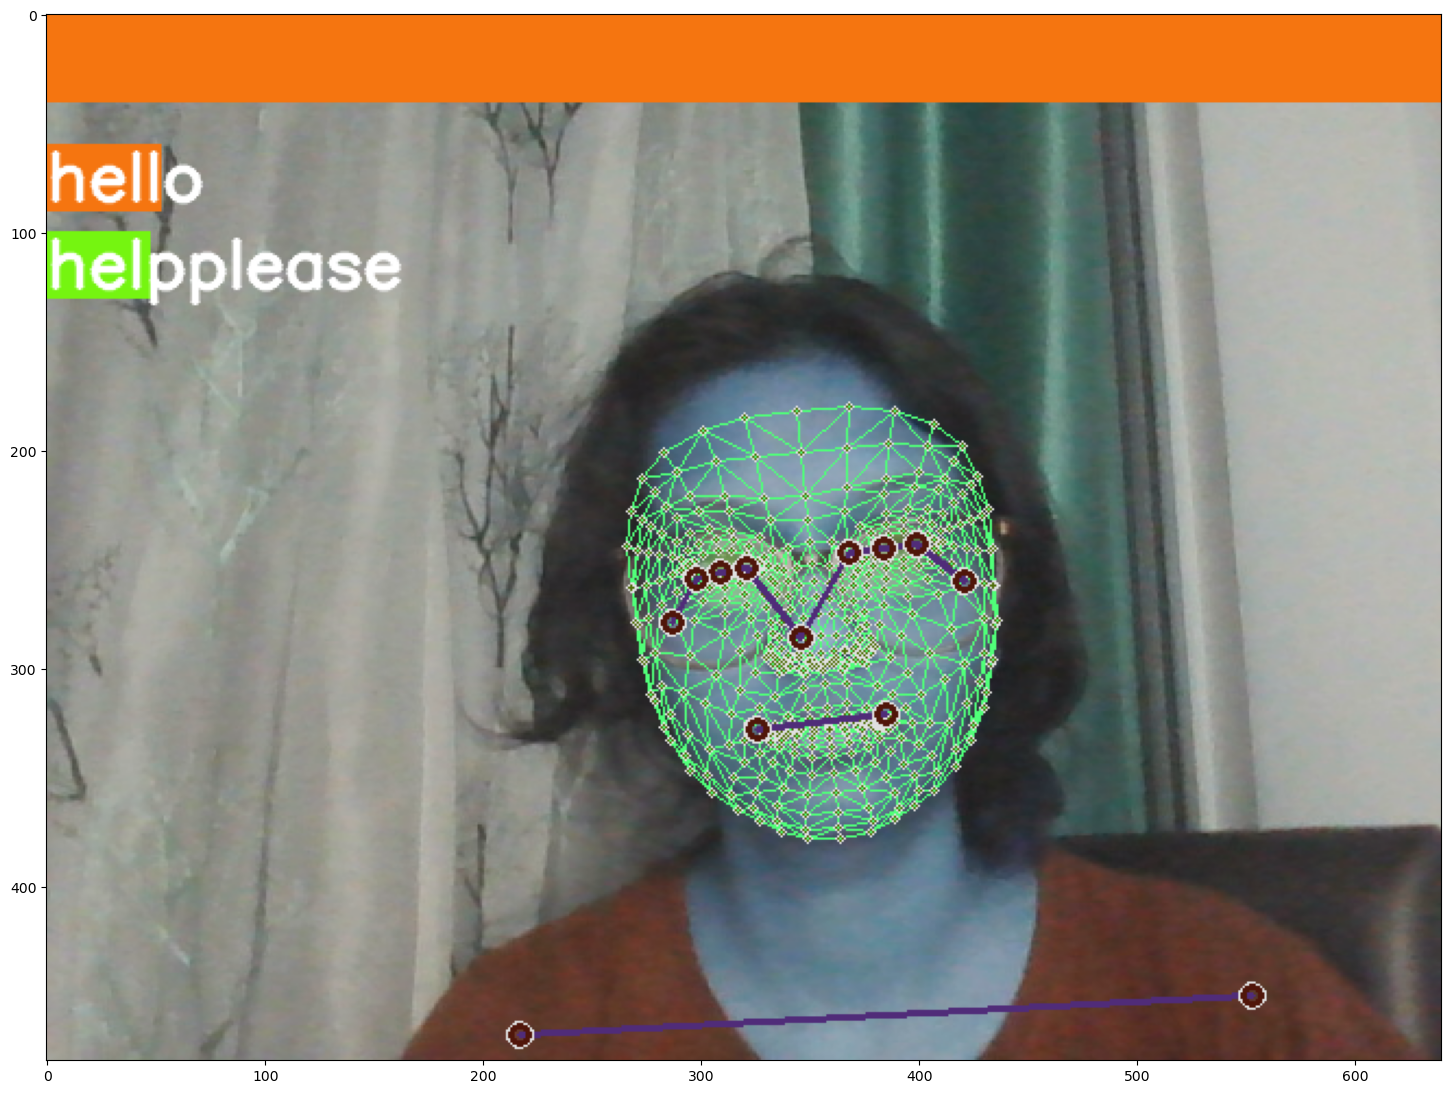

In [419]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [424]:
#pip install pyttsx3

In [425]:
import pyttsx3  
# initialize Text-to-speech engine 
engine = pyttsx3.init()  
# convert this text to speech  
text = action
engine.say(text)  
# play the speech  
engine.runAndWait()  
#raise volume u can hear 'help'